In [8]:
import uproot
import uproot_methods

import awkward

# Histogram section
import boost_histogram as bh
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

# charmonium 2017
#file = ['files/Data17CharmoniumRunE_AOD_102.root']
#file = ['/eos/user/m/mabarros/Charmonium_2017/*.root']

#charmonium 2018
file = ['files/Data18CharmoniumRunB_AOD_2.root','files/Data18CharmoniumRunB_AOD_3.root','files/Data18CharmoniumRunB_AOD_4.root','files/Data18CharmoniumRunB_AOD_7.root', 'files/Data18CharmoniumRunB_AOD_8.root', 'files/Data18CharmoniumRunB_AOD_9.root']

#MuOnia
#file = ['Data17MuOniaRunE_AOD_999.root', 'Data17MuOniaRunE_AOD_998.root', 'Data17MuOniaRunE_AOD_997.root', 'Data17MuOniaRunE_AOD_996.root', 'Data17MuOniaRunE_AOD_995.root', 'Data17MuOniaRunE_AOD_994.root']

In [2]:
def particle_selection_dimu(hlt, save_name, year):
    
    # Histogram definition
    
    # Muon
    hist_muon_lead = bh.Histogram(bh.axis.Regular(50, 0, 50, metadata=r"$p_{T,\mu lead}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu lead}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu lead}$"),)
    hist_muon_trail = bh.Histogram(bh.axis.Regular(50, 0, 50, metadata=r"$p_{T,\mu trail}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu trail}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu trail}$"),)
    
    # Dimuon for jpsi
    hist_dimuon_jpsi = bh.Histogram(bh.axis.Regular(50, 0, 50, metadata=r"$p_{T,\mu^+\mu^-}$ [GeV]"),
                                       bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu^+\mu^-}$"),
                                       bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu^+\mu^-}$"),)
    # Dimuon for upsilon
    hist_dimuon_upsilon = bh.Histogram(bh.axis.Regular(50, 0, 50, metadata=r"$p_{T,\mu^+\mu^-}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu^+\mu^-}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu^+\mu^-}$"),)
    
    
    # Quarkonia
    # j/psi
    hist_jpsi_mass_trigger = bh.Histogram(bh.axis.Regular(100, 2, 4, metadata=r"$J/\Psi candidate mass$ [GeV]"))#, storage=bh.storage.Mean())
    
    # upsilon
    hist_upsilon_mass_trigger = bh.Histogram(bh.axis.Regular(100, 8.5, 11.5, metadata=r"$\Upsilon candidate mass$ [GeV]"))
    
    # D0
    hist_d0_mass_trigger = bh.Histogram(bh.axis.Regular(100, 1.8, 2.2, metadata=r"$m_{D^0}$ [GeV]"))
    hist_d0 = bh.Histogram(bh.axis.Regular(100, 0, 50, metadata=r"$p_{T,D^0}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{D^0}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{D^0}$"),)
    
    # Dstar
    hist_dstar_mass_trigger = bh.Histogram(bh.axis.Regular(200, 1.6, 2.5, metadata=r"$m_{D^*}$ [GeV]"))
    hist_dstar = bh.Histogram(bh.axis.Regular(100, 0, 50, metadata=r"$p_{T,D^*}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{D^*}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{D^*}$"),)
    # Dstar - D0 mass
    hist_dstar_minus_d0 = bh.Histogram(bh.axis.Regular(100, 0.139, 0.157, metadata=r"$m_{D^*-D^0}$ [GeV]"))
    
    # Dstar - D0mass with slow pion refit
    hist_dstar_minus_d0_pirefit = bh.Histogram(bh.axis.Regular(100, 0.139, 0.157, metadata=r"$m_{D^*-D^0}$ [GeV] - pion refit"))
    
    # Slow pion
    hist_slowpion_pt = bh.Histogram(bh.axis.Regular(80, 0, 3, metadata=r"$p_{T,\pi_s}$ [GeV]" ))
    
    # j/psi vertex
    hist_jpsi_vertex = bh.Histogram(bh.axis.Regular(100, -0.15, 0.30, metadata=r"$\mu^+\mu^-_{v_x}$ [GeV]"),
                                  bh.axis.Regular(100, -0.25, 0.1, metadata=r"$\mu^+\mu^-_{v_y}$ [GeV]"),
                                  bh.axis.Regular(100, -12., 12., metadata=r"$\mu^+\mu^-_{v_z}$ [GeV]"),)
    
    # D0 tracks pT
    hist_tracks_pt = bh.Histogram(bh.axis.Regular(100, 0, 40, metadata=r"$p_{T,track1 D0}$ [GeV]"),
                                  bh.axis.Regular(100, 0, 40, metadata=r"$p_{T,track2 D0}$ [GeV]"),)
    
    
    # D0 vertex
    hist_d0_vertex = bh.Histogram(bh.axis.Regular(100, -0.15, 0.30, metadata=r"$D^0_{v_x}$ [GeV]"),
                                  bh.axis.Regular(100, -0.25, 0.1, metadata=r"$D^0_{v_y}$ [GeV]"),
                                  bh.axis.Regular(100, -12., 12., metadata=r"$D^0_{v_z}$ [GeV]"),)
    
    # Quarkonia associated to the D0.
    
    # pT, eta, phi
    hist_quarkonia_asso_d0 = bh.Histogram(bh.axis.Regular(50, 10, 50, metadata=r"$p_{T,\mu^+\mu^-}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu^+\mu^-}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu^+\mu^-}$"),)
    
    # Mass
    hist_quarkonia_asso_d0_mass = bh.Histogram(bh.axis.Regular(100, 2, 4, metadata=r"$m_{\mu^+\mu^-}$ [GeV]"))
    
    trigger = np.array([])
    # Branches of interest
    branches = ['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge', 'Muon_isGlobal', 'Muon_softId', 'nDimu', 'Dimu_pt'
                , 'Dimu_eta', 'Dimu_phi', 'Dimu_mass', 'Dimu_charge', 'Dimu_vtxIdx' , 'Dimu_x', 'Dimu_y', 'Dimu_z', 'Dimut1_muIdx','Dimut2_muIdx'
                ,'nD0', 'D0_pt', 'D0_eta', 'D0_phi', 'D0_rap', 'D0_mass12', 'D0_mass21', 'D0_vtxIdx', 'D0_chi2', 'D0_dl', 'D0_dlErr', 'D0_dlSig'
                ,'D0_cosphi', 'D0_x', 'D0_y', 'D0_z'
                ,'D0t1_pt', 'D0t1_eta', 'D0t1_phi', 'D0t1_chindof', 'D0t1_nValid', 'D0t1_nPix', 'D0t1_dxy', 'D0t1_dz' 
                ,'D0t2_pt', 'D0t2_eta', 'D0t2_phi', 'D0t2_chindof', 'D0t2_nValid', 'D0t2_nPix', 'D0t2_dxy', 'D0t2_dz'
                ,'nDstar', 'Dstar_pt', 'Dstar_eta', 'Dstar_phi', 'Dstar_deltam', 'DstarD0_mass', 'Dstar_vtxIdx', 'Dstar_deltamr', 'Dstarpis_ptr', hlt]
    for chunk in uproot.iterate(file, "Events", branches=branches, entrysteps=500000, namedecode='ascii'):
        
        Muon = JaggedCandidateArray.candidatesfromcounts(chunk['nMuon'],
                                                pt=chunk['Muon_pt'].content,
                                                eta=chunk['Muon_eta'].content,
                                                phi=chunk['Muon_phi'].content,
                                                mass=chunk['Muon_mass'].content,
                                                charge=chunk['Muon_charge'].content,
                                                isGlobal=chunk['Muon_isGlobal'].content,
                                                softId=chunk['Muon_softId'].content,
                                                          
                                               )
        
        Dimu = JaggedCandidateArray.candidatesfromcounts(chunk['nDimu'],
                                                pt=chunk['Dimu_pt'].content,
                                                eta=chunk['Dimu_eta'].content,
                                                phi=chunk['Dimu_phi'].content,
                                                mass=chunk['Dimu_mass'].content,
                                                charge=chunk['Dimu_charge'].content,   
                                                vtxIdx=chunk['Dimu_vtxIdx'].content,
                                                x=chunk['Dimu_x'].content,
                                                y=chunk['Dimu_y'].content,
                                                z=chunk['Dimu_z'].content,
                                                t1Idx=chunk['Dimut1_muIdx'].content,
                                                t2Idx=chunk['Dimut2_muIdx'].content,
                                                          
                                               )
        D0 = JaggedCandidateArray.candidatesfromcounts(chunk['nD0'],
                                                    pt=chunk['D0_pt'].content,
                                                    eta=chunk['D0_eta'].content,
                                                    phi=chunk['D0_phi'].content,
                                                    mass=chunk['D0_mass12'].content,
                                                    vtxIdx=chunk['D0_vtxIdx'].content,
                                                    x=chunk['D0_x'].content,
                                                    y=chunk['D0_y'].content,
                                                    z=chunk['D0_z'].content,
                                                    cosphi=chunk['D0_cosphi'].content,
                                                    dlSig=chunk['D0_dlSig'].content,   
                                                    t1_pt=chunk['D0t1_pt'].content,
                                                    t2_pt=chunk['D0t2_pt'].content,
                                                    t1_eta=chunk['D0t1_eta'].content,
                                                    t2_eta=chunk['D0t2_eta'].content,
                                                    t1_phi=chunk['D0t1_phi'].content,
                                                    t2_phi=chunk['D0t2_phi'].content,
                                                    t1_chindof=chunk['D0t1_chindof'].content,
                                                    t2_chindof=chunk['D0t2_chindof'].content,
                                                    t1_nValid=chunk['D0t1_nValid'].content,
                                                    t2_nValid=chunk['D0t2_nValid'].content,
                                                    t1_nPix=chunk['D0t1_nPix'].content,
                                                    t2_nPix=chunk['D0t2_nPix'].content,
                                                    t1_dxy=chunk['D0t1_dxy'].content,
                                                    t2_dxy=chunk['D0t2_dxy'].content,
                                                    t1_dz=chunk['D0t1_dz'].content,
                                                    t2_dz=chunk['D0t2_dz'].content,)
          
        
        
        Dstar = JaggedCandidateArray.candidatesfromcounts(chunk['nDstar'],
                                                    pt=chunk['Dstar_pt'].content,
                                                    eta=chunk['Dstar_eta'].content,
                                                    phi=chunk['Dstar_phi'].content,
                                                    mass=chunk['Dstar_deltam'].content+chunk['DstarD0_mass'].content, # This is D*-D0
                                                    d0mass=chunk['DstarD0_mass'].content,
                                                    vtxIdx=chunk['Dstar_vtxIdx'].content,
                                                    Deltmass=chunk['Dstar_deltam'].content,
                                                    Deltmassrefit=chunk['Dstar_deltamr'].content,
                                                    ptslowpi=chunk['Dstarpis_ptr'].content,)
        
        
    
        trigger = np.where(chunk[hlt] > 0, True, False)        
        
        ### Trigger filter
        Muon=Muon[trigger]
        Dimu = Dimu[trigger]
        D0 = D0[trigger]
        Dstar = Dstar[trigger]
        
        ############## Cuts ##############

        # Dimu cuts.
        
        pt_cut = (Dimu.pt > 3)
        Dimu = Dimu[pt_cut]
        
        Dimu = Dimu[Dimu.charge == 0]

        # eta_cut
        eta_cut = (np.absolute(Dimu.eta) <= 2.4)
        Dimu = Dimu[eta_cut]
        
        ###### Get the Muons from Dimu ######
        
        if Dimu.counts.sum() > 0:
            mu1Idx = (Dimu.t1Idx + Muon.starts).content
            mu1Idx = (Dimu.t2Idx + Muon.starts).content

            Muon1 = JaggedCandidateArray.fromoffsets(Dimu.offsets, Muon.content[mu1Idx])
            Muon2 = JaggedCandidateArray.fromoffsets(Dimu.offsets, Muon.content[mu1Idx])
        
        else:
            Muon1 = JaggedCandidateArray.fromoffsets(Dimu.offsets, Muon.content[np.array([], dtype='int64')])
            Muon2 = JaggedCandidateArray.fromoffsets(Dimu.offsets, Muon.content[np.array([], dtype='int64')])
        
        # SoftId and Global Muon cuts
        soft_id = (Muon1.softId > 0) & (Muon2.softId > 0)
        Dimu = Dimu[soft_id]
        Muon1 = Muon1[soft_id]
        Muon2 = Muon2[soft_id]
        

        global_muon = (Muon1.isGlobal > 0) & (Muon2.isGlobal > 0)
        Dimu = Dimu[global_muon]
        Muon1 = Muon1[global_muon]
        Muon2 = Muon2[global_muon]
        

        # pt and eta cuts
        pt_cut = (Muon1.pt > 3) & (Muon2.pt > 3)
        Dimu = Dimu[pt_cut]
        Muon1 = Muon1[pt_cut]
        Muon2 = Muon2[pt_cut]
        
        eta_cut = (np.absolute(Muon1.eta) <= 2.4) & (np.absolute(Muon2.eta) <= 2.4)
        Dimu = Dimu[eta_cut]
        Muon1 = Muon1[eta_cut]
        Muon2 = Muon2[eta_cut]
        
        
        # Cuts into events with at least 1 Dimu
        ndimu_cut = Dimu.counts > 0
        Dimu = Dimu[ndimu_cut]
        Muon1 = Muon1[ndimu_cut]
        Muon2 = Muon2[ndimu_cut]
        D0 = D0[ndimu_cut]
        Dstar = Dstar[ndimu_cut]
        
        ############### Leading and Trailing muon separation
        leading_mu = (Muon1.pt.content > Muon2.pt.content)
        Muon_lead = JaggedCandidateArray.candidatesfromoffsets(Dimu.offsets, 
                                                       pt=np.where(leading_mu, Muon1.pt.content, Muon2.pt.content),
                                                       eta=np.where(leading_mu, Muon1.eta.content, Muon2.eta.content),
                                                       phi=np.where(leading_mu, Muon1.phi.content, Muon2.phi.content),
                                                       mass=np.where(leading_mu, Muon1.mass.content, Muon2.mass.content),)

        Muon_trail = JaggedCandidateArray.candidatesfromoffsets(Dimu.offsets, 
                                                       pt=np.where(~leading_mu, Muon1.pt.content, Muon2.pt.content),
                                                       eta=np.where(~leading_mu, Muon1.eta.content, Muon2.eta.content),
                                                       phi=np.where(~leading_mu, Muon1.phi.content, Muon2.phi.content),
                                                       mass=np.where(~leading_mu, Muon1.mass.content, Muon2.mass.content),)
        
        # Quarkonia selection
        # Jpsi
        Dimuon_mass_jpsi = ((Dimu.mass > 2.95) & (Dimu.mass < 3.25))
        jpsi = Dimu[Dimuon_mass_jpsi]
        
        # Upsilon
        Dimuon_mass_upsilon = ((Dimu.mass > 8.5) & (Dimu.mass < 11.5))
        upsilon = Dimu[Dimuon_mass_upsilon]
        
        ######################### Cuts for D0 #########################
        
        # trk cuts
        D0_trk_pt_cut = (D0.t1_pt > 0.8) & (D0.t2_pt > 0.8)
        D0 = D0[D0_trk_pt_cut]
        
        D0_trk_chi2_cut = (D0.t1_chindof < 2.5) & (D0.t2_chindof < 2.5)
        D0 = D0[D0_trk_chi2_cut]
      
        D0_trk_hits_cut = (D0.t1_nValid > 4) & (D0.t2_nValid > 4) & (D0.t1_nPix > 1) & (D0.t2_nPix > 1)
        D0 = D0[D0_trk_hits_cut]
        
        D0_trk_dxy_cut = (D0.t1_dxy < 0.1) & (D0.t2_dxy < 0.1)
        D0 = D0[D0_trk_dxy_cut]
        
        D0_trk_dz_cut = (D0.t1_dz < 1) & (D0.t2_dz < 1)
        D0 = D0[D0_trk_dz_cut]
      
        # D0 cosphi
        D0_cosphi_cut = (D0.cosphi > 0.99)
        D0 = D0[D0_cosphi_cut]
        
        # D0 dl Significance
        D0_dlSig_cut = (D0.dlSig > 5)
        D0 = D0[D0_dlSig_cut]
        
        # D0 pt
        D0_pt_cut = (D0.pt > 3)
        D0 = D0[D0_pt_cut]
            
        ################## Associated particles ########################
        
        """
        quarkonia_asso_d0 = quarkonia.cross(D0)
        
        same_vtx_asso = (quarkonia_asso_d0.i0.vtxIdx == quarkonia_asso_d0.i1.vtxIdx)
        
        quarkonia_asso_d0_same_vtx = quarkonia_asso_d0[same_vtx_asso] 
        """
        """
        quarkonia_asso_d0 = quarkonia.cross(D0)
        
        same_vtx_asso = ( (quarkonia_asso_d0.i0['x'] == quarkonia_asso_d0.i1['x']) & (quarkonia_asso_d0.i0['y'] == quarkonia_asso_d0.i1['y']) & (quarkonia_asso_d0.i0['z'] == quarkonia_asso_d0.i1['z']))
        
        quarkonia_asso_d0_same_vtx = quarkonia_asso_d0[same_vtx_asso] 
        """
        ################################ Filling histograms #####################################
        
        # Lead muon
        hist_muon_lead.fill(Muon_lead.pt.flatten(), Muon_lead.eta.flatten(), Muon_lead.phi.flatten())     
        # Trail muon
        hist_muon_trail.fill(Muon_lead.pt.flatten(), Muon_lead.eta.flatten(), Muon_lead.phi.flatten()) 
        
        # Jpsi
        hist_dimuon_jpsi.fill(jpsi.pt.flatten(), jpsi.eta.flatten(), jpsi.phi.flatten())
        
        hist_jpsi_mass_trigger.fill(jpsi.mass.flatten())#, sample=jpsi.mass.counts)
        
        # Upsilon
        hist_dimuon_upsilon.fill(upsilon.pt.flatten(), upsilon.eta.flatten(), upsilon.phi.flatten())
        
        hist_upsilon_mass_trigger.fill(upsilon.mass.flatten())
        
        # D0 histograms
        hist_d0_mass_trigger.fill(D0.mass.flatten())
        
        hist_d0.fill(D0.pt.flatten(), D0.eta.flatten(), D0.phi.flatten())
        
        hist_d0_vertex.fill(D0.x.flatten(), D0.y.flatten(), D0.z.flatten())
        
        hist_tracks_pt.fill(D0.t1_pt.flatten(), D0.t2_pt.flatten())
        
        # D* histograms        
        hist_dstar_mass_trigger.fill(Dstar.mass.flatten())
        
        hist_dstar.fill(Dstar.pt.flatten(), Dstar.eta.flatten(), Dstar.phi.flatten())
        
        # Dstar-D0 histogram
        hist_dstar_minus_d0.fill(Dstar.Deltmass.flatten())
        
        # Dstar-D0 histogram with pion refit
        hist_dstar_minus_d0_pirefit.fill(Dstar.Deltmassrefit.flatten())
        
        # Slow pion
        hist_slowpion_pt.fill(Dstar.ptslowpi.flatten())
        
        # Vertex histograms
        
        hist_jpsi_vertex.fill(jpsi.x.flatten(), jpsi.y.flatten(), jpsi.z.flatten())
        
        #hist_tracks_pt.fill(Dstar.pt_tk1.flatten(), Dstar.pt_tk2.flatten())
        """
                                #--- Quarkonia associated to d0  ---#
        
        # Mass
        
        hist_quarkonia_asso_d0_mass.fill(quarkonia_asso_d0_same_vtx.i0.mass.flatten())
        
        # pT, eta and phi
        hist_quarkonia_asso_d0.fill(quarkonia_asso_d0_same_vtx.i0.pt.flatten(), quarkonia_asso_d0_same_vtx.i0.eta.flatten()
                                   , quarkonia_asso_d0_same_vtx.i0.phi.flatten())
        """
        
    ################################### Calls plots ###################################
    """
    # Lead Muon
    generate_plot_1d(hist_muon_lead[:, sum, sum], "Lead muon pT plot - " + save_name, year)
    generate_plot_1d(hist_muon_lead[sum, :, sum], "Lead muon eta plot - " + save_name, year)
    generate_plot_1d(hist_muon_lead[sum, sum, :], "Lead muon phi plot - " + save_name, year)
    
    # Trail Muon
    generate_plot_1d(hist_muon_lead[:, sum, sum], "Trail muon pT plot - " + save_name, year)
    generate_plot_1d(hist_muon_lead[sum, :, sum], "Trail muon eta plot - " + save_name, year)
    generate_plot_1d(hist_muon_lead[sum, sum, :], "Trail muon phi plot - " + save_name, year)
    
    # Jpsi pT, eta and phi
    generate_plot_1d(hist_dimuon_jpsi[:, sum, sum], "Jpsi candidate pT plot - " + save_name, year)
    generate_plot_1d(hist_dimuon_jpsi[sum, :, sum], "Jpsi candidate eta plot - " + save_name, year)
    generate_plot_1d(hist_dimuon_jpsi[sum, sum, :], "Jpsi candidate phi plot - " + save_name, year)
    """
    """
    # Upsilon pT, eta and phi
    generate_plot_1d(hist_dimuon_upsilon[:, sum, sum], "Upsilon pT plot - " + save_name, year)
    generate_plot_1d(hist_dimuon_upsilon[sum, :, sum], "Upsilon eta plot - " + save_name, year)
    generate_plot_1d(hist_dimuon_upsilon[sum, sum, :], "Upsilon phi plot - " + save_name, year)
    """
    # Jpsi mass
    generate_plot_1d(hist_jpsi_mass_trigger, "Jpsi candidate mass plot - " + save_name, year)
    # Upsilon mass
    """
    #generate_plot_1d(hist_upsilon_mass_trigger, "Upsilon candidate mass plot - " + save_name, year)
    """
    # D0 tracks pT
    """
    generate_plot_1d(hist_tracks_pt[:, sum], "Track 1 D0 - " + save_name, year)
    generate_plot_1d(hist_tracks_pt[sum, :], "Track 2 D0 - " + save_name, year)
    """
    # D0 mass, pT, eta and phi
    """
    generate_plot_1d(hist_d0_mass_trigger, "D0 mass plot - " + save_name, year)
    generate_plot_1d(hist_d0[:, sum, sum], "D0 pT plot - " + save_name, year)
    generate_plot_1d(hist_d0[sum, :, sum], "D0 eta plot - " + save_name, year)
    generate_plot_1d(hist_d0[sum, sum, :], "D0 phi plot - " + save_name, year)
    """
    """
    # Dstar mass, pT, eta and phi
    
    generate_plot_1d(hist_dstar_mass_trigger, "Dstar mass plot - " + save_name, year)
    
    generate_plot_1d(hist_dstar[:, sum, sum], "Dstar pT plot - " + save_name, year)
    generate_plot_1d(hist_dstar[sum, :, sum], "Dstar eta plot - " + save_name, year)
    generate_plot_1d(hist_dstar[sum, sum, :], "Dstar phi plot - " + save_name, year)
    
    # Dstar- D0 mass
    generate_plot_1d(hist_dstar_minus_d0, "Dstar - D0 mass plot - " + save_name, year)
    # Dstar- D0 mass with pion refit
    generate_plot_1d(hist_dstar_minus_d0_pirefit, "Dstar - D0 mass plot with pion refit - " + save_name, year)
    
    
    # Pion slow pT
    generate_plot_1d(hist_slowpion_pt, "Pion slow pT plot - " + save_name, year)
    """
    # Quarkonia associated to the D0
    """
    generate_plot_1d(hist_quarkonia_asso_d0_mass, "jpsi asso mass plot - " + save_name, year)
    generate_plot_1d(hist_quarkonia_asso_d0[:, sum, sum], "jpsi asso pT plot - " + save_name, year)
    generate_plot_1d(hist_quarkonia_asso_d0[sum, :, sum], "jpsi asso eta plot - " + save_name, year)
    generate_plot_1d(hist_quarkonia_asso_d0[sum, sum, :], "jpsi asso phi plot - " + save_name, year)
    """
    return hist_d0_vertex, hist_jpsi_vertex, hist_jpsi_mass_trigger
    

In [3]:
def generate_plot_1d(hist, save_name, year): 
    
    
    ax = plt.gca()
    
    if "p_{T," in hist.axes[0].metadata:
        plt.yscale('log')
    else:
        ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
        
    
    ax.set_xlim(hist.axes[0].edges[0], hist.axes[0].edges[-1] + hist.axes[0].widths[-1])
    
    ax.set_xlabel(hist.axes[0].metadata, loc='right')
    ax.set_ylabel("Counts", loc='top')

    mean = (hist.view() * hist.axes[0].centers).sum()/hist.sum()
    std = np.sqrt((hist.view()*((hist.axes[0].centers - mean)**2)).sum()/hist.sum())
    
    plt.errorbar(hist.axes[0].centers,
             hist.view(),
             np.sqrt(hist.view()),
             fmt='.',
             color='blue',)

    hep.histplot(hist, '.', ax=ax, linestyle='none', color='black')

    annotation = f"Total {hist.sum()}" \
               + "\n" + f"Mean: {round(mean,2)}" \
               + "\n" + f"Std: {round(std,2)}"
    ax.annotate(annotation, xy=(0.85, 0.85), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None'))
    

    fig = ax.get_figure()
        
    fig.savefig("hlt_choice_" + year + "/" + save_name)

    ax.clear()
    
    

In [4]:
def quarkonia_trigger(year, hlt_name):
    import os, sys, subprocess
    
    os.system("rm -rf hlt_choice_" + year)
    os.system("mkdir -p hlt_choice_" + year)
    
    
    particle_selection_dimu(hlt_name ,hlt_name, year)
    
   
        

In [5]:
quarkonia_trigger("2018", "HLT_DoubleMu4_3_Jpsi")
#quarkonia_trigger("2017", "HLT_Dimuon0_Jpsi")
#quarkonia_trigger("2017", "HLT_Dimuon25_Jpsi")

AttributeError: module 'awkward' has no attribute 'layout'

In [22]:
##################### Vertex plots ##############################3
def generate_vertexplot_1d(hist_dimu, hist_d0, save_name, year): 
    
    from matplotlib.patches import Rectangle
    
    cmap = plt.get_cmap('jet')
    low = cmap(0.1)
    medium =cmap(0.7)
    
    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [low, medium]]
    
    if hist_d0.axes[0].metadata.find('$D^0') == 0:
        str_open_charm = r"$D^0-vertex$"
        
    labels = [r"$\mu^+\mu^--vertex$", r"$D^0-vertex$"]
    plt.legend(handles, labels)
    
    # Dimuons plots
    ax = plt.gca()

    ax.set_xlabel(hist_dimu.axes[0].metadata, loc='right')

    ax.set_ylabel("Counts", loc='top')

    mean = (hist_dimu.view() * hist_dimu.axes[0].centers).sum()/hist_dimu.sum()
    std = np.sqrt((hist_dimu.view()*((hist_dimu.axes[0].centers - mean)**2)).sum()/hist_dimu.sum())

    hep.histplot(hist_dimu, ax=ax, color=low)

    annotation = f"Total {hist_dimu.sum()}" \
               + "\n" + f"Mean: {round(mean,2)}" \
               + "\n" + f"Std: {round(std,2)}"
    ax.annotate(annotation, xy=(0.8, 0.7), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None', color=low))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)

    fig = ax.get_figure()

    # D0 plots
    bx = plt.gca()
    
    a = hist_d0.axes[0].metadata
    b = a.replace(hist_d0.axes[0].metadata, hist_d0.axes[0].metadata[8])

    bx.set_xlabel(b + '[cm]', loc='right')

    bx.set_ylabel("Counts", loc='top')

    mean = (hist_d0.view() * hist_d0.axes[0].centers).sum()/hist_d0.sum()
    std = np.sqrt((hist_d0.view()*((hist_d0.axes[0].centers - mean)**2)).sum()/hist_d0.sum())

    hep.histplot(hist_d0, ax=bx, color=medium)

    annotation = f"Total {hist_d0.sum()}" \
               + "\n" + f"Mean: {round(mean,2)}" \
               + "\n" + f"Std: {round(std,2)}"
    bx.annotate(annotation, xy=(0.8, 0.52), xycoords='axes fraction', fontsize = "small",
               ha='center', annotation_clip=False, bbox=dict(boxstyle='round', fc='None', color=medium))
    bx.ticklabel_format(axis='y', style='sci', scilimits=(0,3), useMathText=True)
    
    fig.savefig("vertex_comparison_" + year + "/" + save_name)
    
    ax.clear()
    bx.clear()
    

In [23]:
def vertex_comparison_1d(year):
  
    import os, sys, subprocess
    
    os.system("rm -rf vertex_comparison_" + year)
    os.system("mkdir -p vertex_comparison_" + year)
    
    

    hist_d0_vertex, hist_dimuon_vertex = particle_selection_dimu("HLT_DoubleMu4_3_Jpsi", "HLT_DoubleMu4_3_Jpsi", year)

    # x distributions
    generate_vertexplot_1d(hist_dimuon_vertex[:, sum, sum], hist_d0_vertex[:, sum, sum], "HLT_DoubleMu4_3_Jpsi_vertex_x", "2018" )
    # y distributions
    generate_vertexplot_1d(hist_dimuon_vertex[sum, :, sum], hist_d0_vertex[sum, :, sum], "HLT_DoubleMu4_3_Jpsi_vertex_y", "2018" )
    # z distributions
    generate_vertexplot_1d(hist_dimuon_vertex[sum, sum, :], hist_d0_vertex[sum, sum, :], "HLT_DoubleMu4_3_Jpsi_vertex_z", "2018" )

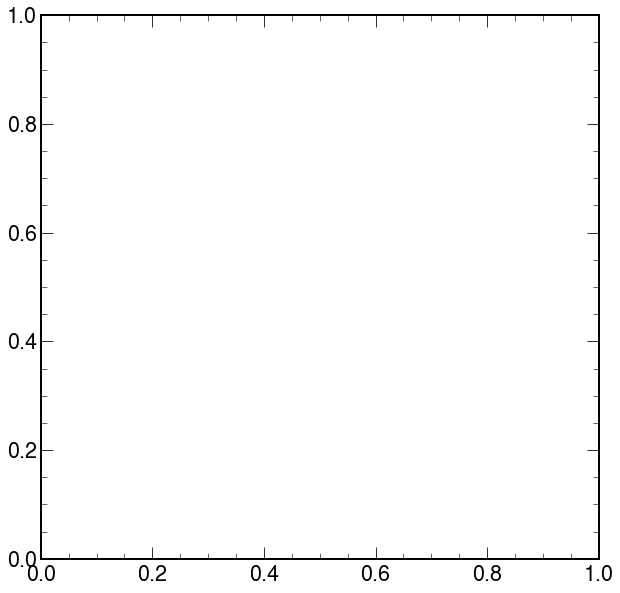

In [24]:
vertex_comparison_1d("2018")


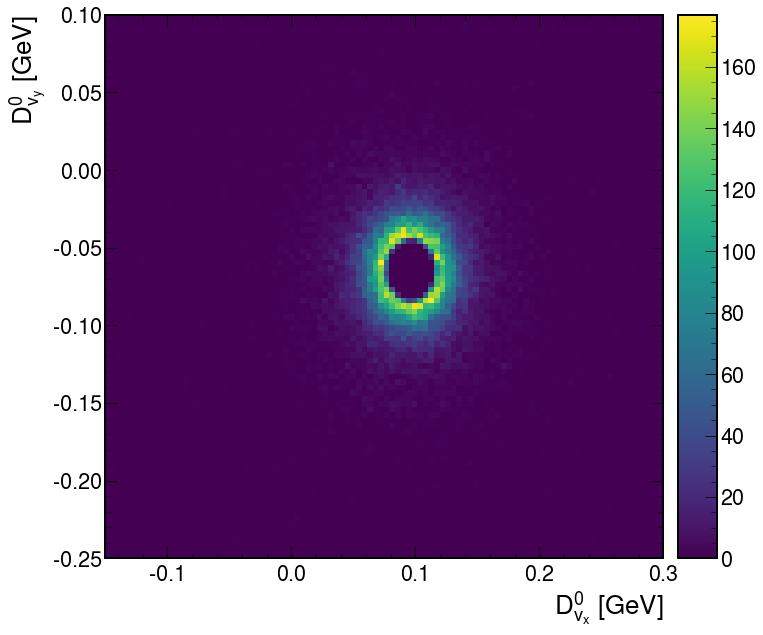

In [32]:
# 2d plots. 
import boost_histogram as bh
import matplotlib.pyplot as plt
import numpy as np

# Create 2d-histogram with two axes with 20 equidistant bins from -3 to 3
#hist_d0_vertex, hist_dimuon_vertex = particle_selection_dimu("HLT_DoubleMu4_3_Jpsi", "HLT_DoubleMu4_3_Jpsi", "2018")
hist_d0_vertex, hist_jpsi_vertex = particle_selection_dimu("HLT_Dimuon25_Jpsi" ,"HLT_Dimuon25_Jpsi", "2018")

hist_d0_xy = hist_d0_vertex[:, :, sum]
w, x, y  = hist_d0_xy.to_numpy()

# Draw the count matrix

ax = plt.gca()

hep.hist2dplot(hist_d0_xy, ax=ax)

ax.set_xlabel(hist_d0_vertex.axes[0].metadata)
ax.set_ylabel(hist_d0_vertex.axes[1].metadata)

plt.savefig("simple_2d.png")

In [ ]:
'''



TESTS!!!!!!






'''

test = JaggedArray.fromiter([[1.1, 2.2, 3.3], [], [1.21, 12]] )


mask = JaggedArray.fromiter([[False, True, False],[],[True, False]])
test[mask]

particle_selection_dimu("HLT_Dimuon10_Upsilon_Barrel_Seagulls", "HLT_Dimuon10_Upsilon_Barrel_Seagulls", "2018")
particle_selection_dimu("HLT_Dimuon12_Upsilon_eta1p5", "HLT_Dimuon12_Upsilon_eta1p5", "2018")
particle_selection_dimu("HLT_Dimuon24_Upsilon_noCorrL1", "HLT_Dimuon24_Upsilon_noCorrL1", "2018")

In [ ]:
################ Muon selection and cut tests #######################
def particle_selection(hlt, save_name, year):
    
    # Histogram definition
    
    # Dimuon
    hist_dimuon = bh.Histogram(bh.axis.Regular(50, 10, 50, metadata=r"$p_{T,\mu^+\mu^-}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu^+\mu^-}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu^+\mu^-}$"),)
    
    # Quarkonia
    # j/psi
    hist_quarkonia_mass_trigger = bh.Histogram(bh.axis.Regular(100, 2, 4, metadata=r"$m_{\mu^+\mu^-}$ [GeV]"))
    
    # upsilon
    #hist_quarkonia_mass_trigger = bh.Histogram(bh.axis.Regular(100, 8, 12, metadata=r"$m_{\mu^+\mu^-}$ [GeV]"))

    
    # D0
    hist_d0_mass_trigger = bh.Histogram(bh.axis.Regular(100, 0.6, 3.2, metadata=r"$m_{D^0}$ [GeV]"))
    hist_d0 = bh.Histogram(bh.axis.Regular(300, 0, 50, metadata=r"$p_{T,D^0}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{D^0}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{D^0}$"),)
    
    # Muon vertex
    hist_dimuon_vertex = bh.Histogram(bh.axis.Regular(100, -1, 1., metadata=r"$\mu^+\mu^-_{v_x}$ [GeV]"),
                                  bh.axis.Regular(100, -1., 1., metadata=r"$\mu^+\mu^-_{v_y}$ [GeV]"),
                                  bh.axis.Regular(100, -15, 15., metadata=r"$\mu^+\mu^-_{v_z}$ [GeV]"),)
    
    # D0 tracks pT
    hist_tracks_pt = bh.Histogram(bh.axis.Regular(300, 0, 40, metadata=r"$p_{T,track1 D0}$ [GeV]"),
                                  bh.axis.Regular(300, 0, 40, metadata=r"$p_{T,track2 D0}$ [GeV]"),)
    
    
    # D0 vertex
    hist_d0_vertex = bh.Histogram(bh.axis.Regular(100, -1, 1., metadata=r"$D^0_{v_x}$ [GeV]"),
                                  bh.axis.Regular(100, -1, 1., metadata=r"$D^0_{v_y}$ [GeV]"),
                                  bh.axis.Regular(100, -15, 15., metadata=r"$D^0_{v_z}$ [GeV]"),)
    
    trigger = np.array([])
    # Muon selection
    branches = ['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge', 'Muon_isGlobal', 'Muon_softId', 'Muon_vtxIdx' , 'Muon_x', 'Muon_y', 'Muon_z'
                    ,'nD0', 'D0_pt', 'D0_eta', 'D0_phi', 'D0_mass12', 'D0_vtxIdx', 'D0_x', 'D0_y', 'D0_z', 'D0t1_pt', 'D0t2_pt', hlt]
    for chunk in uproot.iterate(file, 'Events', branches=branches, entrysteps=500000, namedecode='ascii'):
        Muon = JaggedCandidateArray.candidatesfromcounts(chunk['nMuon'],
                                                pt=chunk['Muon_pt'].content,
                                                eta=chunk['Muon_eta'].content,
                                                phi=chunk['Muon_phi'].content,
                                                mass=chunk['Muon_mass'].content,
                                                charge=chunk['Muon_charge'].content,
                                                isGlobal=chunk['Muon_isGlobal'].content,
                                                softId=chunk['Muon_softId'].content,   
                                                vtxIdx=chunk['Muon_vtxIdx'].content,
                                                x=chunk['Muon_x'].content,
                                                y=chunk['Muon_y'].content,
                                                z=chunk['Muon_z'].content,
                                                          
                                               )
        D0 = JaggedCandidateArray.candidatesfromcounts(chunk['nD0'],
                                                    pt=chunk['D0_pt'].content,
                                                    eta=chunk['D0_eta'].content,
                                                    phi=chunk['D0_phi'].content,
                                                    mass=chunk['D0_mass12'].content,
                                                    vtxIdx=chunk['D0_vtxIdx'].content,
                                                    x=chunk['D0_x'].content,
                                                    y=chunk['D0_y'].content,
                                                    z=chunk['D0_z'].content,
                                                    pt_tk1=chunk['D0t1_pt'].content,
                                                    pt_tk2=chunk['D0t2_pt'].content,)
    
        trigger = np.where(chunk[hlt] > 0, True, False)        
        
        Muon = Muon[trigger]
        D0 = D0[trigger]

        # Basic muon cuts.

        # Soft id cut
        soft_id = (Muon.softId > 0)
        Muon = Muon[soft_id]

        # Global cut
        global_muon = (Muon.isGlobal > 0)
        Muon = Muon[global_muon]

        # pT cuts
        pt_cut = (Muon.pt > 3)
        Muon = Muon[pt_cut]

        # eta_cut
        eta_cut = (np.absolute(Muon.eta) <= 2.4)
        Muon = Muon[eta_cut]

        # Dimuons cuts

        Dimuon_ = (Muon.counts > 1)
        Muon = Muon[Dimuon_]

        D0 = D0[Dimuon_]

        Dimuon = Muon.distincts()

        # Charge and vertex cuts

        opposite_charge = (Dimuon.i0['charge'] * Dimuon.i1['charge'] < 0)
        Dimuon = Dimuon[opposite_charge]

        same_vtx = (Dimuon.i0['vtxIdx'] == Dimuon.i1['vtxIdx']) | (np.absolute(Dimuon.i0['z'] - Dimuon.i1['z']) < 0.2)
        Dimuon = Dimuon[same_vtx]

        # Only events with at least 1 dimuon
        evtcut = (Dimuon.counts > 0)
        Dimuon = Dimuon[evtcut]

        D0 = D0[evtcut]

        # Quarkonia selection
        # J/pspi
        #Dimuon_mass_quarkonia = ((Dimuon.mass > 2.95) & (Dimuon.mass < 3.25))
        
        #Upsilon
        Dimuon_mass_quarkonia = ((Dimuon.mass > 8.5) & (Dimuon.mass < 12.5))
        
        
        quarkonia = Dimuon[Dimuon_mass_quarkonia]
        
        ################## Filling histograms ##################
        
        hist_dimuon.fill(quarkonia.pt.flatten(), quarkonia.eta.flatten(), quarkonia.phi.flatten())
        
        hist_quarkonia_mass_trigger.fill(quarkonia.mass.flatten())
        
        hist_d0_mass_trigger.fill(D0.mass.flatten())
        
        hist_d0.fill(D0.pt.flatten(), D0.eta.flatten(), D0.phi.flatten())
        
        hist_d0_vertex.fill(D0.x.flatten(), D0.y.flatten(), D0.z.flatten())
        
        hist_dimuon_vertex.fill(Muon.x.flatten(), Muon.y.flatten(), Muon.z.flatten())
        
        hist_tracks_pt.fill(D0.pt_tk1.flatten(), D0.pt_tk2.flatten())
        
        
    # Calls plots
    generate_plot_1d(hist_dimuon[:, sum, sum], "dimuon pT plot - " + save_name, year)
    generate_plot_1d(hist_dimuon[sum, :, sum], "dimuon eta plot - " + save_name, year)
    generate_plot_1d(hist_dimuon[sum, sum, :], "dimuon phi plot - " + save_name, year)

    generate_plot_1d(hist_quarkonia_mass_trigger, "jpsi mass plot - " + save_name, year)
    
    generate_plot_1d(hist_tracks_pt[:, sum], "Track 1 D0 - " + save_name, year)
    generate_plot_1d(hist_tracks_pt[sum, :], "Track 2 D0 - " + save_name, year)

    generate_plot_1d(hist_d0_mass_trigger, "D0 mass plot - " + save_name, year)
    generate_plot_1d(hist_d0[:, sum, sum], "D0 pT plot - " + save_name, year)
    generate_plot_1d(hist_d0[sum, :, sum], "D0 eta plot - " + save_name, year)
    generate_plot_1d(hist_d0[sum, sum, :], "D0 phi plot - " + save_name, year)
        
    return hist_d0_vertex, hist_dimuon_vertex
    

In [10]:
def particle_selection(hlt, save_name, year):
    
    # Histogram definition
    
    # Dimuon
    hist_dimuon = bh.Histogram(bh.axis.Regular(50, 10, 50, metadata=r"$p_{T,\mu^+\mu^-}$ [GeV]"),
                                 bh.axis.Regular(80, -4.0, 4.0, metadata=r"$\eta_{\mu^+\mu^-}$"),
                                 bh.axis.Regular(70, -3.5, 3.5, metadata=r"$\phi_{\mu^+\mu^-}$"),)
        
    trigger = np.array([])
    # Muon selection
    branches = ['nMuon', 'Muon_pt', 'Muon_eta', 'Muon_phi', 'Muon_mass', 'Muon_charge', 'Muon_isGlobal', 'Muon_softId', 'Muon_vtxIdx' , 'Muon_x', 'Muon_y', 'Muon_z'
                    ,'nD0', 'D0_pt', 'D0_eta', 'D0_phi', 'D0_mass12', 'D0_vtxIdx', 'D0_x', 'D0_y', 'D0_z', 'D0t1_pt', 'D0t2_pt', hlt]
    for chunk in uproot.iterate(file, 'Events', branches=branches, entrysteps=500000, namedecode='ascii'):
        Muon = JaggedCandidateArray.candidatesfromcounts(chunk['nMuon'],
                                                pt=chunk['Muon_pt'].content,
                                                eta=chunk['Muon_eta'].content,
                                                phi=chunk['Muon_phi'].content,
                                                mass=chunk['Muon_mass'].content,
                                                charge=chunk['Muon_charge'].content,
                                                isGlobal=chunk['Muon_isGlobal'].content,
                                                softId=chunk['Muon_softId'].content,   
                                                vtxIdx=chunk['Muon_vtxIdx'].content,
                                                x=chunk['Muon_x'].content,
                                                y=chunk['Muon_y'].content,
                                                z=chunk['Muon_z'].content,
                                                          
                                               )
        trigger = np.where(chunk[hlt] > 0, True, False)        
        
        Muon = Muon[trigger]
        
        # Basic muon cuts.

        # Soft id cut
        soft_id = (Muon.softId > 0)
        Muon = Muon[soft_id]

        # Global cut
        global_muon = (Muon.isGlobal > 0)
        Muon = Muon[global_muon]

        # pT cuts
        pt_cut = (Muon.pt > 3)
        Muon = Muon[pt_cut]

        # eta_cut
        eta_cut = (np.absolute(Muon.eta) <= 2.4)
        Muon = Muon[eta_cut]

        # Dimuons cuts

        Dimuon_ = (Muon.counts > 1)
        Dimuon = Muon[Dimuon_]

        # Charge and vertex cuts

        opposite_charge = (Dimuon.i0['charge'] * Dimuon.i1['charge'] < 0)
        Dimuon = Dimuon[opposite_charge]

        same_vtx = (Dimuon.i0['vtxIdx'] == Dimuon.i1['vtxIdx']) | (np.absolute(Dimuon.i0['z'] - Dimuon.i1['z']) < 0.2)
        Dimuon = Dimuon[same_vtx]

        # Only events with at least 1 dimuon
        evtcut = (Dimuon.counts > 0)
        Dimuon = Dimuon[evtcut]

        # Quarkonia selection
        # J/pspi
        #Dimuon_mass_quarkonia = ((Dimuon.mass > 2.95) & (Dimuon.mass < 3.25))
        
        #Upsilon
        Dimuon_mass_quarkonia = ((Dimuon.mass > 8.5) & (Dimuon.mass < 12.5))
        
        
        quarkonia = Dimuon[Dimuon_mass_quarkonia]
        
        ################## Filling histograms ##################
        
        hist_dimuon.fill(quarkonia.pt.flatten(), quarkonia.eta.flatten(), quarkonia.phi.flatten())        
        
    # Calls plots
    generate_plot_1d(hist_dimuon[:, sum, sum], "dimuon pT plot - " + save_name, year)
    generate_plot_1d(hist_dimuon[sum, :, sum], "dimuon eta plot - " + save_name, year)
    generate_plot_1d(hist_dimuon[sum, sum, :], "dimuon phi plot - " + save_name, year)
        
    return hist_d0_vertex, hist_dimuon_vertex

In [11]:
particle_selection("HLT_DoubleMu4_3_Jpsi", "HLT_DoubleMu4_3_Jpsi", '2018')

ValueError: no column named '0'

In [43]:
h=[5,8,6]

In [45]:
data = np.random.multivariate_normal((0,1), ((.1, 0.3), (0.3, 1.0)), size=10_000).T.copy()

In [48]:
data[0]

array([ 0.37214267,  0.23968819, -0.21758874, ..., -0.17459426,
       -0.0453739 ,  0.37143164])